## Подготовительная работа
* [Installing a Library Permanently in Colab](https://saturncloud.io/blog/how-to-install-a-library-permanently-in-colab/)

In [1]:
## connect google drive
from google.colab import drive


drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install virtualenv
!virtualenv /content/drive/MyDrive/vkr/kmu/virtual_env

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 18.6 MB/s eta 0:00:00
created virtual environment CPython3.10.12.final.0-64 in 34270ms
  creator CPython3Posix(dest=/content/drive/MyDrive/vkr/kmu/virtual_env, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: Cython==3.0.10, Jinja2==3.1.3, MarkupSafe==2.1.5, affine==2.4.0, attrs==23.2.0, blosc2==2.6.1, certifi==2024.2.2, charset_normalizer==3.3.2, click==8.1.7, click_plugins==1.1.1, cligj==0.7.2, contextily==1.6.0, contourpy==1.2.0, cycler==0.12.1, cykhash==2.0.1, fiona==1.9.6, fonttools==4.50.0, geographiclib==2.0, geopandas==0.14.3, geopy==2.4.1, idna==3.6, joblib==1.3.2, kiwisolver==1.4.5, mapclassify==2.6.1, matplotlib==3.8.3, mercantile==1.2.1, msgpack==1.0.8, ndindex==1.8, networkx==3.

In [3]:
import sys


venv_path = "/content/drive/MyDrive/vkr/kmu/virtual_env/lib/python3.10/site-packages"
if venv_path not in sys.path:
  # add the path of the virtual environment site-packages to colab system path
  sys.path.append(venv_path)
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/vkr/kmu/virtual_env/lib/python3.10/site-packages']

## Networkx

```bash
!source /content/drive/MyDrive/vkr/kmu/virtual_env/bin/activate; pip install pyrosm contextily mapclassify osmnx pandana
```

In [ ]:
!source /content/drive/MyDrive/vkr/kmu/virtual_env/bin/activate; pip install pandana

In [ ]:
!pip freeze

### Конфигурация

In [4]:
DIR_OSM = '/content/drive/MyDrive/vkr/kmu/src/osm/'
CITY = 'SanktPetersburg'
BBOX = [30.2561753, 59.929385, 30.3637657, 59.9832816]
UTM_ZONE = 32636
MAP_DIST = 50
MAX_DIST = 500
MAX_ITEMS = 10

config = {
    'dir_osm': DIR_OSM,
    'city': CITY,
    'crs': UTM_ZONE,
    'filters': {
        'buildings': {
            'all': {
                'building': True
            },
            'residential_only': {
                'building': [
                'apartments',
                'residential'
              ]
            }
        },
        'POIs': {
            'shop': [
                'convenience',
                'supermarket',
                'mall',
                'greengrocer'
            ],
            'amenity': [
                'pharmacy',
                'school',
                'kindergarten',
                'clinic'
            ],
            'healthcare': [
                'clinic'
            ]
        },
        'network_type': [
            'walking',
            'driving'
        ]
    },
    'bbox': BBOX,
    'map_dist': MAP_DIST,
    'max_dist': MAX_DIST,
    'max_items': MAX_ITEMS
}

### Логирование

<details>
<summary> Log levels</summary>

```py
logging.debug("A DEBUG Message")
logging.info("An INFO")
logging.warning("A WARNING")
logging.error("An ERROR")
logging.critical("A message of CRITICAL severity")
```
</details>

In [ ]:
!pwd

/content


In [6]:
import logging


logger = logging.getLogger()
fhandler = logging.FileHandler(filename=config["dir_osm"]+'obj_assessment_networkx.log', mode='w')
logger.addHandler(fhandler)
logger.setLevel(logging.INFO)

### Загрузка подготовленных данных

In [15]:
from geopandas import read_file


fp = ''
network_type = config['filters']['network_type'][0]
#network_type = config['filters']['network_type'][1]

if 'bbox' in config:
  fp = DIR_OSM + 'spb_bbox.gpkg'

  # buildings
  buildings = read_file(fp, layer='buildings_with_objective_metrics')
  if buildings.crs is None:
     logger.info(f'buildings crs is None')

  # graph
  nodes = read_file(fp, layer=f'{network_type}_nodes')
  edges = read_file(fp, layer=f'{network_type}_edges')
  if nodes.crs is None:
     logger.info(f'graph crs is None')

  logger.info(f'read buildings/{network_type}_graph from {fp}')

else:
  fp = DIR_OSM + 'spb.gpkg'

  # buildings
  buildings = read_file(fp, layer='buildings_with_objective_metrics')
  if buildings.crs is None:
     logger.info(f'buildings crs is None')

  # graph
  nodes = read_file(fp, layer=f'{network_type}_nodes')
  edges = read_file(fp, layer=f'{network_type}_edges')
  if nodes.crs is None:
     logger.info(f'graph crs is None')

  logger.info(f'read buildings/{network_type}_graph from {fp}')


INFO:root:read buildings/walking_graph from /content/drive/MyDrive/vkr/kmu/src/osm/spb_bbox.gpkg


In [16]:
buildings.head(2)

,id,building,centroid_x,centroid_y,node_id,access_sum,k_div_access,accessibility,proximity,geometry
0,16960662,apartments,346952.030481,6.648785e+06,7177932386,0.205882,0.4,0.082353,0.695502,"POLYGON ((346938.573 6648792.461, 346950.029 6..."
1,17063465,apartments,346792.083845,6.649158e+06,5824120858,0.058824,0.2,0.011765,0.070108,"POLYGON ((346796.010 6649130.969, 346780.855 6..."


In [17]:
nodes.head(2)

,id,x,y,geometry
0,10240355599,350768.977867,6.647817e+06,POINT (350768.978 6647816.641)
1,1591433310,350772.206656,6.647831e+06,POINT (350772.207 6647830.545)


In [18]:
edges.head(2)

,u,v,length,oneway,highway,geometry
0,10240355599,1591433310,14.247,no,unclassified,"LINESTRING (350768.978 6647816.641, 350769.630..."
1,1591433310,9296451194,24.230,no,unclassified,"LINESTRING (350772.207 6647830.545, 350777.960..."


### Networkx graph

In [22]:
from pyrosm import get_data, OSM


# download data for the city
fp = get_data(dataset=config['city'], directory=config['dir_osm'])
logger.info(f'data was downloaded to {fp}')

if 'bbox' in config:
  osm = OSM(fp, bounding_box=config['bbox'])
  logger.info(f'work with bbox: {config["bbox"]}')
else:
  osm = OSM(fp)
  logger.info(f'work with all city: {config["city"]}')

networkx_graph = osm.to_graph(nodes, edges, network_type=network_type, graph_type='networkx')
logger.info(f'create networkx {network_type} grapg')

INFO:root:data was downloaded to /content/drive/MyDrive/vkr/kmu/src/osm/SanktPetersburg.osm.pbf
INFO:root:work with bbox: [30.2561753, 59.929385, 30.3637657, 59.9832816]
INFO:root:create networkx walking grapg


### Closeness centrality

In [38]:
nodes.head(2)

,id,x,y,geometry
0,10240355599,350768.977867,6.647817e+06,POINT (350768.978 6647816.641)
1,1591433310,350772.206656,6.647831e+06,POINT (350772.207 6647830.545)


In [47]:
xmin = 349100-500
xmax = 349600+500
ymin = 6649900-500
ymax = 6650400+500

selected_nodes = [i for i, d in networkx_graph.nodes(data=True) if (d['x'] > xmin and d['x'] < xmax) and (d['y'] > ymin and d['y'] < ymax)]
sub_graph = networkx_graph.subgraph(selected_nodes)
logger.info(f'select subgraph from networkx {network_type} graph')

INFO:root:select subgraph from networkx walking graph


In [74]:
%%time
import pandas as pd
from networkx import closeness_centrality


nodes_with_closeness = pd.DataFrame(closeness_centrality(sub_graph, distance='length').items(), columns=['id', 'closeness']).set_index('id')
logger.info(f'calculate closeness centrality')

INFO:root:calculate closeness centrality


CPU times: user 1min 20s, sys: 245 ms, total: 1min 21s
Wall time: 1min 24s


In [75]:
nodes_with_closeness.head(2)

,closeness
id,
1350426624,0.001005
973012994,0.000933


In [76]:
nodes_with_closeness_norm = (nodes_with_closeness - nodes_with_closeness.min()) / (nodes_with_closeness.max() - nodes_with_closeness.min())
logger.info(f'linear normalization of closeness')

INFO:root:linear normalization of closeness


In [77]:
nodes_with_closeness_norm.head(2)

,closeness
id,
1350426624,0.723267
973012994,0.671794


In [78]:
buildings_with_closeness = buildings.merge(nodes_with_closeness_norm.reset_index().rename(columns={'id':'node_id'}), left_on='node_id', right_on='node_id')
logger.info(f'add closeness to buildings_with_obj_metrics')

INFO:root:add closeness to buildings_with_obj_metrics


In [79]:
buildings_with_closeness.head(2)

,id,building,centroid_x,centroid_y,node_id,access_sum,k_div_access,accessibility,proximity,geometry,closeness
0,23391230,residential,348850.473697,6.649828e+06,4579858332,1.242260,0.8,0.993808,2.679610,"POLYGON ((348838.552 6649858.731, 348851.727 6...",0.731548
1,30506921,apartments,349522.300392,6.650856e+06,7280866717,1.596362,1.0,1.596362,3.480666,"POLYGON ((349472.204 6650823.805, 349476.513 6...",0.643441


INFO:root:save buildings with closeness to /content/drive/MyDrive/vkr/kmu/src/osm/images/buildings_with_closeness_via_walking_network.png


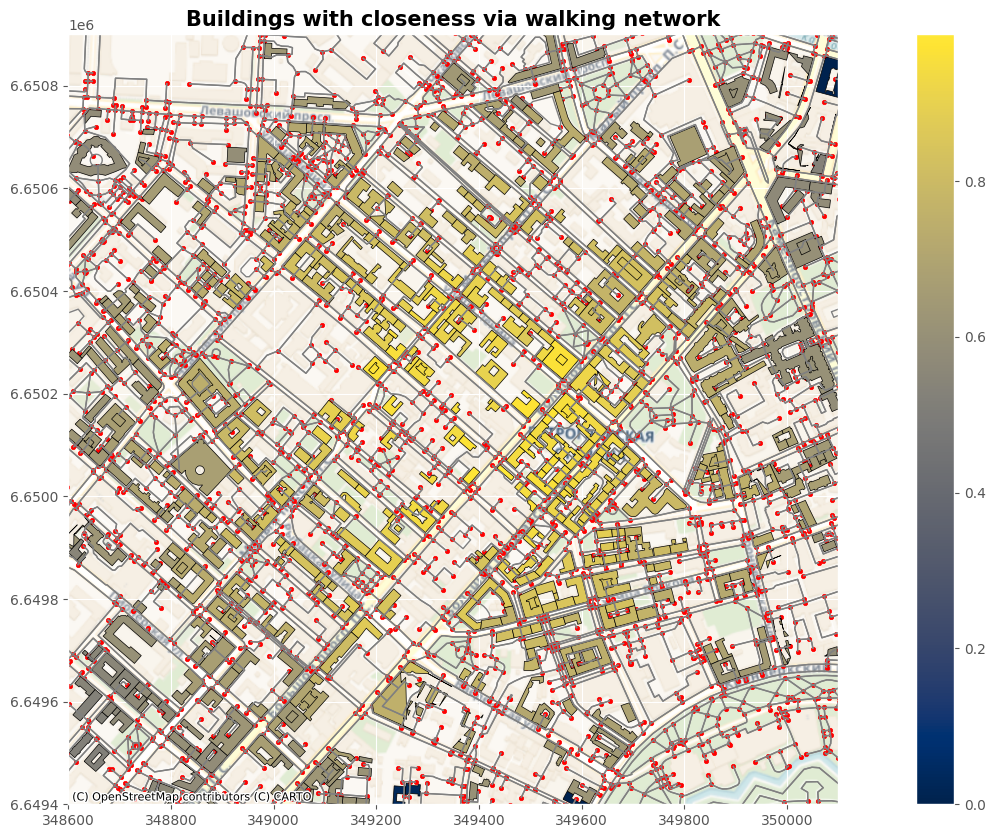

In [96]:
import contextily as cx
from matplotlib import pyplot as plt


with plt.style.context("ggplot"):
  ax = nodes.plot(figsize=(20, 10), label='nodes', color='red', markersize=10, alpha=1)
  ax = edges.plot(ax=ax, label='edges', color='gray', linewidth=1, alpha=1)

  ax = buildings_with_closeness.plot(ax=ax, column='closeness', legend=True, edgecolor='black', alpha=1, cmap='cividis')
  plt.setp(ax, xlim=(349100-500, 349600+500), ylim=(6649900-500, 6650400+500))
  cx.add_basemap(ax=ax, crs=buildings_with_closeness.crs.to_string(), source=cx.providers.CartoDB.Voyager)
  ax.set_title(f'Buildings with closeness via {network_type} network', fontsize=15, fontweight='bold')
  fp = config['dir_osm']+f'images/buildings_with_closeness_via_{network_type}_network.png'
  plt.savefig(fp)
  logger.info(f'save buildings with closeness to {fp}')
  plt.show()

In [84]:
buildings_with_closeness[['accessibility', 'proximity', 'closeness']].corr()

,accessibility,proximity,closeness
accessibility,1.000000,0.678507,-0.117727
proximity,0.678507,1.000000,-0.174294
closeness,-0.117727,-0.174294,1.000000


### Betweenness centrality

In [110]:
%%time
import pandas as pd
from networkx import betweenness_centrality


nodes_with_betweenness = pd.DataFrame(betweenness_centrality(sub_graph, weight='length').items(), columns=['id', 'betweenness']).set_index('id')
logger.info(f'calculate betweenness centrality')

INFO:root:calculate betweenness centrality


CPU times: user 6min 24s, sys: 1.17 s, total: 6min 25s
Wall time: 6min 35s


In [111]:
nodes_with_betweenness.head(2)

,betweenness
id,
1350426624,0.021053
973012994,0.000000


In [112]:
nodes_with_betweenness_norm = (nodes_with_betweenness - nodes_with_betweenness.min()) / (nodes_with_betweenness.max() - nodes_with_betweenness.min())
logger.info(f'linear normalization of betweenness')

INFO:root:linear normalization of betweenness


In [113]:
nodes_with_betweenness_norm.head(2)

,betweenness
id,
1350426624,0.193322
973012994,0.000000


In [114]:
buildings_with_betweenness = buildings_with_closeness.merge(nodes_with_betweenness_norm.reset_index().rename(columns={'id':'node_id'}), left_on='node_id', right_on='node_id')
logger.info(f'add betweenness to buildings_with_betweenness')

INFO:root:add betweenness to buildings_with_betweenness


In [115]:
buildings_with_betweenness.head(2)

,id,building,centroid_x,centroid_y,node_id,access_sum,k_div_access,accessibility,proximity,geometry,closeness,betweenness
0,23391230,residential,348850.473697,6.649828e+06,4579858332,1.242260,0.8,0.993808,2.679610,"POLYGON ((348838.552 6649858.731, 348851.727 6...",0.731548,0.026989
1,30506921,apartments,349522.300392,6.650856e+06,7280866717,1.596362,1.0,1.596362,3.480666,"POLYGON ((349472.204 6650823.805, 349476.513 6...",0.643441,0.002104


INFO:root:save buildings with betweenness to /content/drive/MyDrive/vkr/kmu/src/osm/images/buildings_with_betweenness_via_walking_network.png


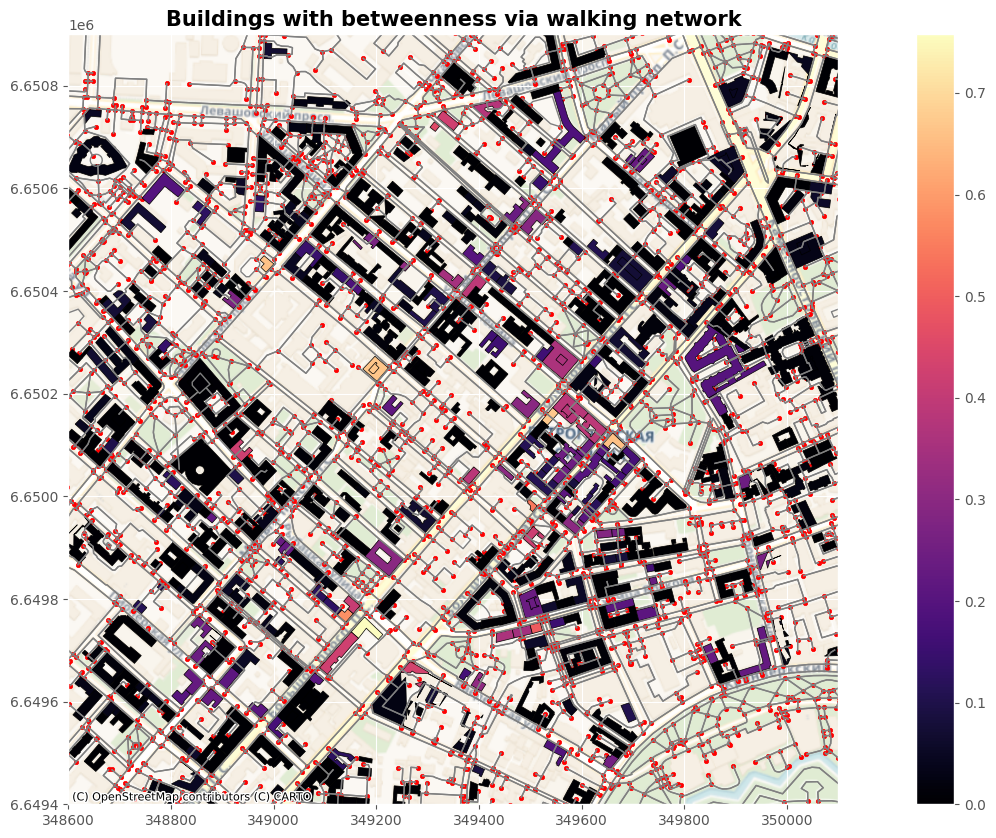

In [121]:
import contextily as cx
from matplotlib import pyplot as plt


with plt.style.context("ggplot"):
  ax = nodes.plot(figsize=(20, 10), label='nodes', color='red', markersize=10, alpha=1)
  ax = edges.plot(ax=ax, label='edges', color='gray', linewidth=1, alpha=1)

  ax = buildings_with_betweenness.plot(ax=ax, column='betweenness', legend=True, edgecolor='black', alpha=1, cmap='magma')
  plt.setp(ax, xlim=(349100-500, 349600+500), ylim=(6649900-500, 6650400+500))
  cx.add_basemap(ax=ax, crs=buildings_with_betweenness.crs.to_string(), source=cx.providers.CartoDB.Voyager)
  ax.set_title(f'Buildings with betweenness via {network_type} network', fontsize=15, fontweight='bold')
  fp = config['dir_osm']+f'images/buildings_with_betweenness_via_{network_type}_network.png'
  plt.savefig(fp)
  logger.info(f'save buildings with betweenness to {fp}')
  plt.show()

In [118]:
buildings_with_betweenness[['accessibility', 'proximity', 'closeness', 'betweenness']].corr()

,accessibility,proximity,closeness,betweenness
accessibility,1.000000,0.678507,-0.117727,0.180707
proximity,0.678507,1.000000,-0.174294,0.172166
closeness,-0.117727,-0.174294,1.000000,0.283705
betweenness,0.180707,0.172166,0.283705,1.000000


In [119]:
buildings_with_centrality = buildings_with_betweenness

In [120]:
buildings_with_centrality.head(2)

,id,building,centroid_x,centroid_y,node_id,access_sum,k_div_access,accessibility,proximity,geometry,closeness,betweenness
0,23391230,residential,348850.473697,6.649828e+06,4579858332,1.242260,0.8,0.993808,2.679610,"POLYGON ((348838.552 6649858.731, 348851.727 6...",0.731548,0.026989
1,30506921,apartments,349522.300392,6.650856e+06,7280866717,1.596362,1.0,1.596362,3.480666,"POLYGON ((349472.204 6650823.805, 349476.513 6...",0.643441,0.002104


In [122]:
fp = ''
if 'bbox' in config:
  fp = config['dir_osm'] + 'spb_bbox.gpkg'
  buildings_with_centrality.to_file(fp, driver='GPKG', layer='buildings_with_centrality', encoding='utf-8')
  logger.info(f'save buildings with centrality to {fp}')
else:
  fp = config['dir_osm'] + 'spb.gpkg'
  buildings_with_centrality.to_file(fp, driver='GPKG', layer='buildings_with_centrality', encoding='utf-8')
  logger.info(f'save buildings with centrality to {fp}')

INFO:root:save buildings with centrality to /content/drive/MyDrive/vkr/kmu/src/osm/spb_bbox.gpkg


In [123]:
from geopandas import read_file


buildings_from_gpkg = read_file(fp, layer='buildings_with_centrality')

if buildings_with_centrality.shape[0] == buildings_from_gpkg.shape[0] and buildings_with_centrality.crs == buildings_from_gpkg.crs:
  logger.info(f'buildings with centrality successfully loaded from gpkg')

INFO:root:buildings with centrality successfully loaded from gpkg


In [124]:
buildings_from_gpkg.head(2)

,id,building,centroid_x,centroid_y,node_id,access_sum,k_div_access,accessibility,proximity,closeness,betweenness,geometry
0,23391230,residential,348850.473697,6.649828e+06,4579858332,1.242260,0.8,0.993808,2.679610,0.731548,0.026989,"POLYGON ((348838.552 6649858.731, 348851.727 6..."
1,30506921,apartments,349522.300392,6.650856e+06,7280866717,1.596362,1.0,1.596362,3.480666,0.643441,0.002104,"POLYGON ((349472.204 6650823.805, 349476.513 6..."
